<a href="https://colab.research.google.com/github/Ronnypetson/titanic/blob/master/MNIST_Maromba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experimentos do Produto Interno Maromba no MNIST

### Ambiente

In [1]:
import torch
import numpy as np
import torch.nn as nn
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from torchvision import transforms
from torchvision.transforms import ToTensor, Normalize
from torch.optim import Adam, SGD

import pandas as pd
from sklearn.metrics import accuracy_score
# !pip3 install ipympl
# !pip3 install mpl_interactions
# %matplotlib widget

import matplotlib.pylab as plt
import plotly.express as px
# import mpl_interactions.ipyplot as iplt
import time
from IPython import display
from IPython.core.debugger import Pdb

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# %matplotlib inline
# from google.colab import output
# output.enable_custom_widget_manager()

### Dataset

In [ ]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
    ]
)

tr = ToTensor()
# cifar10_norm = Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
cifar10_norm = Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))

channels = 3
img_dim = 32

def _transform(x):
  # x = x.resize((channels, img_dim, img_dim))
  return (
      cifar10_norm(tr(x))
      .reshape(channels, img_dim, img_dim)
      .permute(1, 2, 0)
      .reshape(-1)
  )
  # return (tr(x) / 255.0).reshape(-1)
  # return transform(x).reshape(-1)
  # return (tr(x) * 2.0 - 1.0).reshape(-1)
  # return (tr(x)).reshape(-1)
  # return (tr(x).mean(dim=0)).reshape(-1)

bsize = 8 ###

# SOURCE_DATASET = MNIST
# SOURCE_DATASET = FashionMNIST
SOURCE_DATASET = CIFAR10

MNIST_train_data = SOURCE_DATASET(
    "MNIST_root/",
    download=True,
    train=True,
    transform=_transform,
)
train_data_loader = torch.utils.data.DataLoader(
    MNIST_train_data,
    batch_size=bsize,
    shuffle=True,
    num_workers=1,
)

MNIST_test_data = SOURCE_DATASET(
    "MNIST_root_test/",
    download=True,
    train=False,
    transform=_transform,
)
test_data_loader = torch.utils.data.DataLoader(
    MNIST_test_data,
    batch_size=bsize,
    shuffle=True,
    num_workers=1,
)

In [3]:
# import torch.nn.functional as F

# # config = {
# #     "features": {
# #         "pre-set": channels,
# #         "sets":    [1024,    1024,    1,],
# #         "samples": [25,      1,       1024,],
# #     },
# #     "params": {
# #         "sets":    [4,       1,       num_classes,],
# #         "samples": [(76, 1), (1, 5),  (1025, 1),],
# #         "is conv": [True,    True,    False,]
# #     },
# # }

# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 4, 5, padding="same", bias=False)
#         # self.pool = nn.MaxPool2d(2, 2)
#         # self.conv2 = nn.Conv2d(6, 8, 5, padding="same", bias=False)
#         self.conv2 = nn.Conv2d(4, 1, 1, padding="same", bias=False)
#         self.fc1 = nn.Linear(1024, 10, bias=False)
#         # self.fc2 = nn.Linear(100, 10, bias=False)

#     def forward(self, x):
#         x = F.elu(self.conv1(x))
#         x = F.elu(self.conv2(x))
#         # x = F.elu(self.conv3(x))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = self.fc1(x)
#         return x

# net = Net()

In [4]:
# import torch.optim as optim
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [5]:
# trainloader = train_data_loader
# for epoch in range(2):  # loop over the dataset multiple times
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         # get the inputs; data is a list of [inputs, labels]
#         inputs, labels = data
#         # zero the parameter gradients
#         optimizer.zero_grad()
#         # forward + backward + optimize
#         outputs = net(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         # print statistics
#         running_loss += loss.item()
#         if i % 60 == 59:    # print every 60 mini-batches
#             print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 60:.3f}')
#             running_loss = 0.0
# print('Finished Training')

In [6]:
# img, lbl = next(iter(test_data_loader))
# img = img.reshape(-1, 3, 32, 32)
# img = img.permute(0, 2, 3, 1).cpu().detach().numpy()

In [7]:
# img[0].min(), img[0].max(), img[0].mean()

# cifar10_classes = [
#     "airplane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"
# ]
# _idx = 3
# print(cifar10_classes[lbl[_idx].item()])
# plt.imshow(img[_idx])

In [58]:
def cartesian_idx(rows, cols, chs=1, d=2, offset=0, mag=0.1):
  # idx = np.zeros((rows, cols, chs, d))
  idx = np.random.uniform(low=-mag, high=mag, size=(rows, cols, chs, d))
  # idx = np.ones((rows, cols, chs, d))
  for row in range(rows):
    for col in range(cols):
      for ch in range(chs):
        idx[row, col, ch, 0] = 2.0 * ((row + offset) / rows) - 1.0
        idx[row, col, ch, 1] = 2.0 * ((col + offset) / cols) - 1.0
        idx[row, col, ch, 2] = 0.01 * ((ch  + offset) /  chs) - 0.05
  idx = torch.from_numpy(idx)
  idx = idx.reshape(rows * cols * chs, d)
  return idx

def _cartesian_idx(rows, cols, chs=1, d=2, offset=0, mag=0.1):
  # idx = np.zeros((rows, cols, chs, d))
  idx = np.random.uniform(low=-mag, high=mag, size=(rows, cols, chs, d))
  # idx = np.ones((rows, cols, chs, d))
  for row in range(rows):
    for col in range(cols):
      for ch in range(chs):
        idx[row, col, ch, 0] = (row + offset)
        idx[row, col, ch, 1] = (col + offset)
        idx[row, col, ch, 2] = (ch  + offset)
  idx = torch.from_numpy(idx)
  idx = idx.reshape(rows * cols * chs, d)
  return idx

### Kernels, similaridades e funções de índice

#### Kernels

In [9]:
def _soft_kernel(idxu, part_dim):
  """
  idxu: M x d_u x d_idx
  """
  m, d_u, d_idx = idxu.shape
  assert d_idx % part_dim == 0
  range = 20.0
  norm_idxu = range * idxu.reshape(m, d_u, -1, part_dim) - (range / 2.0)
  norm_idxu = torch.softmax(norm_idxu, dim=-1)
  dim_norm = (d_idx // part_dim) ** 0.5
  norm_idxu = norm_idxu.reshape(m, d_u, d_idx) / dim_norm
  return norm_idxu

def _cosine_kernel(idxu, *args, **kwargs):
  """
  idxu: M x d_u x d_idx
  """
  # TODO: compute min_idx, max_idx and normalize
  m, d_u, d_idx = idxu.shape
  min_idxu = torch.min(idxu, dim=1)[0].unsqueeze(1)
  max_idxu = torch.max(idxu, dim=1)[0].unsqueeze(1)
  eps = 1e-4
  idxu = (idxu - min_idxu) / (max_idxu - min_idxu + eps)
  norm_idxu = idxu / (torch.norm(idxu, dim=-1).unsqueeze(-1) + eps)
  # Reverse kernel trick for polynomial x^2
  idxu2 = norm_idxu.reshape(-1, d_idx, 1)
  idxu2 = torch.bmm(idxu2, idxu2.permute(0, 2, 1)).reshape(m, d_u, -1)
  # return norm_idxu
  return idxu2

#### Similaridades

In [10]:
def squared_cosine(idxu, idxv):
  """
  idxu: pre_shape x d_idx
  idxv: pre_shape x d_idx
  """
  assert idxu.shape == idxv.shape
  d_idx = idxu.shape[-1]
  sim = torch.bmm(
      idxu.reshape(-1, 1, d_idx),
      idxv.reshape(-1, d_idx, 1),
  )
  # sim = (torch.exp(sim) - 1.0) / (1.718)
  sim = sim ** 4.0
  return sim

def relu_cosine(idxu, idxv, bias=0.9):
  """
  idxu: pre_shape x d_idx
  idxv: pre_shape x d_idx
  """
  assert idxu.shape == idxv.shape
  d_idx = idxu.shape[-1]
  sim = nn.functional.relu(
      torch.bmm(
          idxu.reshape(-1, 1, d_idx),
          idxv.reshape(-1, d_idx, 1),
      )
      - bias
  )
  sim = sim.reshape(idxu.shape[:-1])
  return sim

#### Funções-valor

In [11]:
def vecsum(u, v):
  return u + v

def vecmean(u, v):
  return (u + v) / 2.0

def vecprod(u, v):
  """
  Element-wise product. NOT dot product.
  """
  return u * v

#### Dots

##### Utilities

In [12]:
class Pairwise:
  def __init__(self, f):
    """
    f: (pre_shape x d_val, pre_shape x d_val) -> pre_shape x d_val_out
    """
    self._f = f

  def __call__(self, u, v):
    """
    u: pre_shape_u x d_u x d_val
    v: pre_shape_v x d_v x d_val
    ans: pre_shape_u x pre_shape_v x d_u x d_v x d_val_out
    """
    ps_u, ps_v = u.shape[:-2], v.shape[:-2]
    pps_u, pps_v = np.prod(ps_u), np.prod(ps_v)
    d_u, d_val = u.shape[-2:]
    d_v, d_valv = v.shape[-2:]
    assert d_val == d_valv
    # u, v: pps_u x pps_v x d_u x d_v x d_val
    u = u.reshape(pps_u,     1, d_u,   1, d_val)
    v = v.reshape(    1, pps_v,   1, d_v, d_val)
    u = u.repeat(     1, pps_v,   1, d_v,     1)
    v = v.repeat( pps_u,     1, d_u,   1,     1)
    # fuv: ps_u x ps_v x d_u x d_v x d_val_out
    fuv = self._f(u, v)
    fuv = fuv.reshape(*ps_u, *ps_v, d_u, d_v, -1)
    return fuv

def __minmax_normalize(idxu):
  """
  idxu: pre_shape x d_idx
  """
  min_idxu = torch.min(idxu, dim=1)[0].unsqueeze(1)
  max_idxu = torch.max(idxu, dim=1)[0].unsqueeze(1)
  eps = 1e-6
  idxu = min_idxu + ((idxu - min_idxu) / (max_idxu - min_idxu + eps))
  return idxu

def minmax_normalize(idxu):
  """
  idxu: pre_shape x d_idx
  """
  min_idxu = torch.min(idxu, dim=1)[0].unsqueeze(1)
  max_idxu = torch.max(idxu, dim=1)[0].unsqueeze(1)
  eps = 1e-6
  idxu = 2.0 * ((idxu - min_idxu) / (max_idxu - min_idxu + eps)) - 1.0
  return idxu

def norm_normalize(u):
  """
  u: pre_shape x d_val
  """
  eps = 1e-6
  u = u / (u.norm(dim=-1).unsqueeze(-1) + eps)
  return u

def normalized(idxu):
  """
  idxu: pre_shape x d_idx
  """
  idxu = minmax_normalize(idxu)
  idxu = norm_normalize(idxu)
  return idxu

def poly1norm(idxu):
  """
  idxu: pre_shape x d_idx
  """
  idxu = normalized(idxu)
  ones = torch.ones((*idxu.shape[:-1], 1)).to(idxu.device)
  idxu = (0.5 ** 0.5) * torch.cat([idxu, ones], dim=-1)
  return idxu

def poly2norm(idxu):
  """
  idxu: pre_shape x d_idx
  """
  idxu = normalized(idxu)
  ones = torch.ones((*idxu.shape[:-1], 1)).to(idxu.device)
  d_idx = idxu.shape[-1]
  _idxu = idxu.reshape((-1, d_idx, 1))
  middle = (
      torch.bmm(_idxu, _idxu.permute(0, 2, 1))
      .reshape((*idxu.shape[:-1], d_idx ** 2))
  )
  idxu = 0.5 * torch.cat([(2.0 ** 0.5) * idxu, middle, ones], dim=-1)
  return idxu

from functools import lru_cache
from collections import defaultdict as dd
from itertools import product

@lru_cache()
def poly_terms(idx_dim, degree):
  combs = dd(int)
  ranges = (range(idx_dim) for _ in range(degree))
  for idxs in product(*ranges):
      comb = tuple(sorted(idxs))
      combs[comb] += 1
  return list(combs.items())

"""
sigmoid(8*x - 4)
1/(1 + e^4)
+ (8 e^4 x)/(1 + e^4)^2
+ (32 e^4 (e^4 - 1) x^2)/(1 + e^4)^3
+ (256 (e^4 - 4 e^8 + e^12) x^3)/(3 (1 + e^4)^4)
+ (512 e^4 (-1 + 11 e^4 - 11 e^8 + e^12) x^4)/(3 (1 + e^4)^5)
+ (4096 (e^4 - 26 e^8 + 66 e^12 - 26 e^16 + e^20) x^5)/(15 (1 + e^4)^6)
+ O(x^6)
(Taylor series)
-------------------------
0.017986  * x^0
0.14130   * x^1
0.5448747 * x^2
1.3474883 * x^3
2.290065  * x^4
2.4479883 * x^5
"""

def poly_norm(idxu, degree):
  """
  idxu: pre_shape x d_idx
  """
  pre_shape = idxu.shape[:-1]
  idx_dim = idxu.shape[-1]
  idxu = normalized(idxu)
  terms = poly_terms(idx_dim, degree)
  factors = torch.tensor([term[1] for term in terms]).float().to(idxu.device)
  factors = factors ** 0.5
  intidx = torch.tensor([list(term[0]) for term in terms]).long().to(idxu.device)
  intidx = intidx.reshape(-1)
  idxu = idxu.reshape(-1, idx_dim)[:, intidx]
  idxu = idxu.reshape(*pre_shape, degree, -1)
  idxu = idxu.prod(dim=-2) * factors.reshape(*((1,) * len(pre_shape)), idxu.shape[-1])
  return idxu

@lru_cache()
def get_eye(m, d_u, d_v, n, device="cpu"):
  eye = (
      torch.eye(max(d_u, d_v))
      [:d_u, :d_v]
      .unsqueeze(0)
      .unsqueeze(-1)
      .repeat(m, 1, 1, n)
      .to(device)
  )
  return eye

def log_sinkhorn(log_alpha, n_iter):
    """ https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/sampling/permutations.html
    [1] Sinkhorn, Richard and Knopp, Paul.
    Concerning nonnegative matrices and doubly stochastic
    matrices. Pacific Journal of Mathematics, 1967
    Args:
      log_alpha: 2D tensor (a matrix of shape [N, N])
        or 3D tensor (a batch of matrices of shape = [batch_size, N, N])
      n_iters: number of sinkhorn iterations
    """
    for _ in range(n_iter):
        # log_alpha = log_alpha - torch.logsumexp(log_alpha, -1, keepdim=True)
        # log_alpha = log_alpha - torch.logsumexp(log_alpha, -2, keepdim=True)
        log_alpha = log_alpha - torch.logsumexp(log_alpha, -2, keepdim=True)
        log_alpha = log_alpha - torch.logsumexp(log_alpha, -1, keepdim=True)
    return log_alpha.exp()

##### Dot products

In [13]:
def _rdot(u, v, *args):
  """
  "Regular Dot product"
  u: M x d_u x d_val
  v: N x d_v x d_val
  """
  m, d_u, d_val = u.shape
  n, d_v, _d_val = v.shape
  if d_u != d_v:
    return _nsbmd(u, v, *args)
  assert _d_val == d_val
  dot = (
      u.permute(0, 2, 1).reshape(-1, d_u)
      @ v.permute(1, 0, 2).reshape(d_v, -1)
  ).reshape(m, d_val, n, d_val).permute(0, 2, 1, 3)
  dot = torch.diagonal(dot, dim1=2, dim2=3)
  return dot

def _knndot(u, v, idxu, idxv) -> torch.Tensor:
  """
  "k-NN Maromba Dot"
  u: M x d_u x d_val
  v: N x d_v x d_val
  idxu: M x d_u x d_idx
  idxv: N x d_v x d_idx
  """
  m, d_u, d_idx  = idxu.shape
  n, d_v, d_idxv = idxv.shape
  d_val = u.shape[-1]
  assert d_idx == d_idxv
  assert d_val == v.shape[-1]
  assert (m, d_u) == u.shape[:2]
  assert (n, d_v) == v.shape[:2]
  num_neigh = 1
  dots = []
  q_idxu = idxu.cpu().detach().numpy().reshape(-1, d_idx)
  for _pos in range(n):
    neigh = NearestNeighbors(n_neighbors=num_neigh, metric="cosine")
    neigh.fit(idxv[_pos].cpu().detach().numpy().reshape(-1, d_idx))
    n_idxu = neigh.kneighbors(
        q_idxu, return_distance=False
    ).reshape(-1)
    n_idxu = torch.from_numpy(n_idxu).long()
    _v = v[_pos].reshape(-1, d_val)[n_idxu].reshape(m, d_u, d_val)
    # _dot: M x d_val x d_val
    _dot = torch.bmm(_v.permute(0, 2, 1), _v)
    # _dot: M x 1 x d_val
    _dot = torch.diagonal(_dot, dim1=1, dim2=2).unsqueeze(1)
    dots.append(_dot)
  # dot: M x N x d_val
  dot = torch.cat(dots, dim=1)
  return dot

def _icbmd(u, idxu, idxv) -> torch.Tensor:
  """
  "Conv Index Batch Maromba Dot"
  u: M x d_u x d_valu
  idxu: M x d_u x d_idx
  idxv: N x 1 x d_idx
  """
  m, d_u, d_idx  = idxu.shape
  n, d_v, d_idxv = idxv.shape
  d_valu = u.shape[-1]
  assert d_idx == d_idxv
  assert d_v == 1
  assert (m, d_u) == u.shape[:2]
  idxu = normalized(idxu)
  idxv = normalized(idxv)
  d_idx = idxu.shape[-1]
  # idxv: M x d_u x N
  idxv = (
      (idxu.reshape(m * d_u, d_idx))
      @ idxv.permute(2, 1, 0).reshape(d_idx, n)
  ).reshape(m, d_u, n)
  # idxv: M x N x d
  idxv = torch.bmm(
      u.permute(0, 2, 1),
      idxv
  ).permute(0, 2, 1)
  return idxv

def _ibmd(u, v, idxu, idxv) -> torch.Tensor:
  """
  "Index Batch Maromba Dot"
  u: M x d_u x d_valu
  v: N x d_v x d_valv
  idxu: M x d_u x d_idx
  idxv: N x d_v x d_idx
  """
  m, d_u, d_idx  = idxu.shape
  n, d_v, d_idxv = idxv.shape
  d_valu, d_valv = u.shape[-1], v.shape[-1]
  assert d_idx == d_idxv
  assert (m, d_u) == u.shape[:2]
  assert (n, d_v) == v.shape[:2]
  idxu = normalized(idxu)
  idxv = normalized(idxv)
  # idxu = poly_norm(idxu, 1) # / (d_u)
  # idxv = poly_norm(idxv, 1) # / (d_v)
  d_idx = idxu.shape[-1]
  # idxv: N x d_idx x d_valv
  idxv = torch.bmm(idxv.permute(0, 2, 1), v)
  # idxv: M x d_u x (d_valv * N)
  idxv = (
      idxu.reshape(m * d_u, d_idx)
      @ idxv.permute(1, 2, 0).reshape(d_idx, d_valv * n)
  ).reshape(m, d_u, d_valv * n)
  # idxv: M x d_valu x (d_valv * N)
  idxv = torch.bmm(u.permute(0, 2, 1), idxv)
  if d_valv == 1:
    # idxv: M x N x d_valu
    idxv = idxv.reshape(m, d_valu, n).permute(0, 2, 1)
  else:
    # idxv: M x N x d_valu or error
    idxv = idxv.reshape(m, d_valu, d_valv, n).permute(0, 3, 1, 2)
    idxv = torch.diagonal(idxv, dim1=2, dim2=3)
  return idxv

def _fbmd(u, v, idxu, idxv) -> torch.Tensor:
  """
  "Fast Batch Maromba Dot"
  u: M x d_u x d_val
  v: N x d_v x d_val
  idxu: M x d_u x d_idx
  idxv: N x d_v x d_idx
  """
  m, d_u, d_idx  = idxu.shape
  n, d_v, d_idxv = idxv.shape
  d_val = u.shape[-1]
  assert d_idx == d_idxv
  assert d_val == v.shape[-1]
  assert (m, d_u) == u.shape[:2]
  assert (n, d_v) == v.shape[:2]
  idxu = normalized(idxu)
  idxv = normalized(idxv)
  d_idx = idxu.shape[-1]
  # idxu: M x d_val x d_idx
  # idxv: N x d_idx x d_val
  idxu = torch.bmm(u.permute(0, 2, 1), idxu)
  idxv = torch.bmm(idxv.permute(0, 2, 1), v)
  # idxu: M x N x d_val
  idxu = (
    (
        idxu.reshape(m * d_val, d_idx)
        @ (
            idxv
            .permute(0, 2, 1)
            .reshape(n * d_val, d_idx)
            .T
          )
    ).reshape(m, d_val, n, d_val)
    .permute(0, 2, 1, 3)
  )
  idxu = torch.diagonal(idxu, dim1=2, dim2=3)
  return idxu

def batch_mdot(u, v, idxu, idxv) -> torch.Tensor:
  """
  "Batch Maromba Dot"
  u: M x d_u x d_val
  v: N x d_v x d_val
  idxu: M x d_u x d_idx
  idxv: N x d_v x d_idx
  """
  m, d_u, d_idx  = idxu.shape
  n, d_v, d_idxv = idxv.shape
  d_val = u.shape[-1]
  assert d_idx == d_idxv
  assert d_val == v.shape[-1]
  assert (m, d_u) == u.shape[:2]
  assert (n, d_v) == v.shape[:2]
  if d_idx * (d_u + n) < n * d_u * (d_idx + 1):
    return _fbmd(u, v, idxu, idxv)
  else:
    return _ibmd(u, v, idxu, idxv)

def _nsbmd(u, v, idxu, idxv, bias=0.5) -> torch.Tensor:
  """
  "Non-linear Similarity Batch Maromba Dot"
  u: M x d_u x d_val
  v: N x d_v x d_val
  idxu: M x d_u x d_idx
  idxv: N x d_v x d_idx
  """
  m, d_u, d_idx  = idxu.shape
  n, d_v, d_idxv = idxv.shape
  d_val = u.shape[-1]
  assert d_idx == d_idxv
  assert d_val == v.shape[-1]
  assert (m, d_u) == u.shape[:2]
  assert (n, d_v) == v.shape[:2]
  idxu = normalized(idxu)
  idxv = normalized(idxv)
  # idxuv: M x d_u x d_v x N
  ###
  # idxuv = idxu.reshape(m * d_u, d_idx) @ idxv.reshape(n * d_v, d_idx).T
  # idxuv = idxuv.reshape(m, d_u, n, d_v).permute(0, 1, 3, 2)
  # mag = 80.0
  # # idxuv = nn.functional.softmax(mag * idxuv - (mag / 2.0), dim=2)
  # # idxuv = nn.functional.softmax(mag * idxuv, dim=2)
  # idxuv = (
  #     log_sinkhorn(mag * idxuv.permute(0, 3, 1, 2), 6)
  #     .permute(0, 2, 3, 1)
  # )
  ###
  from random import randint
  bsidx = randint(0, m - 1)
  m_ = 1 # m,
  idxuv = (
      idxu[bsidx].reshape(m_ * d_u, d_idx)
      @ idxv.reshape(n * d_v, d_idx).T
  )
  idxuv = idxuv.reshape(m_, d_u, n, d_v).permute(0, 1, 3, 2)
  mag = 80.0
  ###
  # siter = 6
  # idxuv = (
  #     log_sinkhorn(mag * idxuv.permute(0, 3, 1, 2), siter)
  #     .permute(0, 2, 3, 1)
  # )
  ###
  # Tanh seems to work for high-dimensional idx
  # ReLU(x - alpha) / (1.0 - alpha) works for small samples
  alpha = 0.95
  idxuv = nn.functional.relu(idxuv - alpha) / (1.0 - alpha)
  ###
  idxuv = idxuv.repeat(m, 1, 1, 1)
  ###
  # from random import randint
  # bsidx = randint(0, m - 1)
  # m_ = 1
  # mag = 80.0
  # # idxu = log_sinkhorn(mag * idxu[bsidx].unsqueeze(0), 6)
  # # idxv = log_sinkhorn(mag * idxv, 6)
  # idxu = nn.functional.softmax(mag * idxu[bsidx].unsqueeze(0), dim=1)
  # idxv = nn.functional.softmax(mag * idxv, dim=1)
  # idxuv = idxu.reshape(m_ * d_u, d_idx) @ idxv.reshape(n * d_v, d_idx).T
  # idxuv = idxuv.reshape(m_, d_u, n, d_v).permute(0, 1, 3, 2)
  # idxuv = idxuv.repeat(m, 1, 1, 1)
  ###
  # uidxuv: (M x d_val x d_v x N) -> (N x d_v x d_val x M)
  uidxuv = (
      torch.bmm(
        u.permute(0, 2, 1),
        idxuv.reshape(m, d_u, d_v * n)
      )
      .reshape(m, d_val, d_v, n)
      .permute(3, 2, 1, 0)
  )
  # uidxuvv: N x M x d_val x d_val
  uidxuvv = (
      torch.bmm(
          uidxuv.permute(0, 3, 2, 1).reshape(n * m, d_val, d_v),
          v.unsqueeze(1).repeat(1, m, 1, 1).reshape(n * m, d_v, d_val)
      )
      .reshape(n, m, d_val, d_val)
  )
  # dot: M x N x d_val
  dot = torch.diagonal(uidxuvv, dim1=2, dim2=3)
  dot = dot.permute(1, 0, 2)
  return dot

### Classe Tensor Maromba

In [14]:
class MTensor:
  def __init__(
      self,
      values: torch.Tensor,
      indices: torch.Tensor,
      indexer: nn.Module=nn.Identity(),
    ):
    assert values.shape == indices.shape[:-1]
    self.data = values
    self.idx = indices
    self.idx_dim = indices.shape[-1]
    self.indexer = indexer
    self._idx_part = img_dim
    self._eps = 1e-6

  def __getitem__(self, idx):
    return MTensor(self.data[idx], self.idx[idx], self.indexer)

  def __setitem__(self, idx, value):
    self.data[idx] = value.data
    self.idx[idx] = value.idx

  def __delitem__(self, idx):
    del self.data[idx]
    del self.idx[idx]

  def __len__(self):
    return len(self.data)

  @staticmethod
  def cat(mts, dim=0):
    if dim == -1:
      dim = len(mt.data.shape) - 1
    values = [mt.data for mt in mts]
    indices = [mt.idx for mt in mts]
    values = torch.cat(values, dim=dim)
    indices = torch.cat(indices, dim=dim)
    mt = MTensor(values, indices)
    return mt

  @staticmethod
  def unsqueeze(mt, dim=0):
    assert dim != -1
    assert dim < len(mt.idx.shape) - 1
    mt.data = mt.data.unsqueeze(dim)
    mt.idx = mt.idx.unsqueeze(dim)
    return mt

  @staticmethod
  def squeeze(mt, dim=0):
    assert dim != -1
    assert dim < len(mt.idx.shape) - 1
    mt.data = mt.data.squeeze(dim)
    mt.idx = mt.idx.squeeze(dim)
    return mt

  @staticmethod
  def clone(mt):
    return MTensor(mt.data, mt.idx, mt.indexer)

  @staticmethod
  def reshape(mt, shape):
    idx_shape = shape + (mt.idx_dim,)
    nmt = MTensor(
        mt.data.reshape(shape),
        mt.idx.reshape(idx_shape),
        mt.indexer
    )
    return nmt

  @staticmethod
  def permute(mt, perm):
    idx_perm = perm + (-1,)
    nmt = MTensor(
        mt.data.permute(*perm),
        mt.idx.permute(*idx_perm),
        mt.indexer
    )
    return nmt

  def __matmul__(self, b):
    """
    Useful for computing m-product between a batch of inputs (N x ...) and a
    parameter matrix (m x n).

    self.data: pre_shape(self) x in_dim(self)
    self.data.idx: pre_shape(self) x in_dim(self) x d_idx
    b.data: pre_shape(b) x in_dim(b)
    b.idx: pre_shape(b) x in_dim(b) x d_idx

    Returns "mdot"
    mdot.data: pre_shape(self) x pre_shape(b)
    mdot.idx: pre_shape(self) x pre_shape(b) x d_idx
    """
    apre = self.data.shape[:-1]
    bpre = b.data.shape[:-1]
    d_idx = self.idx.shape[-1]
    assert d_idx == b.idx.shape[-1]
    aidx = self.idx.reshape(*((-1,) + self.idx.shape[-2:]))
    bidx = b.idx.reshape(*((-1,) + b.idx.shape[-2:]))
    ###
    # _nsbmd
    # _rdot
    # _knndot
    # _fbmd
    # _ibmd, _mbmd
    # batch_mdot
    ###
    mdot = _nsbmd(
        self.data.reshape(-1, self.data.shape[-1], 1),
        b.data.reshape(-1, b.data.shape[-1], 1),
        aidx,
        bidx,
    )
    mdot = mdot.reshape(apre + bpre)
    # New indices
    # ###
    _aidx = aidx.mean(dim=-2, keepdim=True)
    _bidx = bidx.mean(dim=-2, keepdim=True)
    onesa = torch.ones(_aidx.shape).to(_aidx.device)
    onesb = torch.ones(_bidx.shape).to(_bidx.device)
    midx = (
        _nsbmd(_aidx, onesb, _aidx, _bidx)
        + _nsbmd(onesa, _bidx, _aidx, _bidx)
    ) / 2.0
    ###
    # midx = _icbmd(aidx, aidx, bidx.sum(dim=-2, keepdim=True)) # / aidx.shape[-2]
    ###
    # midx = (
    #     _nsbmd(aidx, 1.0 - bidx, aidx, bidx)
    #     + _nsbmd(1.0 - aidx, bidx, aidx, bidx)
    # )
    ###
    new_shape = apre + bpre + (d_idx,)
    midx = midx.reshape(new_shape)
    #
    mdot = MTensor(mdot, midx, self.indexer)
    return mdot

  def __mul__(self, b):
    """
    self: N x out_a x in_a (x d_idx)
    b:    N x out_b x in_b (x d_idx)
    """
    n, out_a, in_a = self.data.shape
    assert b.data.shape[0] == n
    _, out_b, in_b = b.data.shape
    d_idx = self.idx.shape[-1]
    assert b.idx.shape[-1] == d_idx
    ### Solução provisória. Calcular o índice com paralelismo ainda não é possível.
    mdots = [MTensor.unsqueeze(self[idx] @ b[idx], dim=0) for idx in range(n)]
    mdots = MTensor.cat(mdots, dim=0)
    return mdots

### Classe do Módulo Treinável

#### Sampling functions

In [15]:
from sklearn.neighbors import NearestNeighbors


def idxhood(xidx, ws, stride=None, num_sets=None, sample=False):
  xidx = xidx.reshape(-1, xidx.shape[-1]).cpu().detach().numpy()
  # xidx = xidx / np.linalg.norm(xidx, axis=-1)[:, None]
  # set desired number of neighbors
  nneigh = int(np.prod(ws))
  neigh = NearestNeighbors(n_neighbors=nneigh)
  neigh.fit(xidx)
  # select indices of k nearest neighbors of the vectors in the input list
  if sample:
    if num_sets is None:
      num_sets = (len(xidx) + (len(xidx) % stride)) // stride
    subidx = np.random.choice(len(xidx), size=num_sets, replace=False)
    all_hoods = neigh.kneighbors(
        xidx[subidx], return_distance=False
    ).reshape(-1)
  else:
    _neigh = NearestNeighbors(n_neighbors=nneigh)
    _ids = np.array([[pos // img_dim, pos % img_dim] for pos in range(len(xidx))])
    # _ids = np.array([[pos] for pos in range(len(xidx))])
    _neigh.fit(_ids)
    if stride is None:
      stride = len(xidx) // num_sets
    all_hoods = _neigh.kneighbors(
        _ids[::stride], return_distance=False
    ).reshape(-1)
  all_hoods = torch.from_numpy(all_hoods).long()
  return all_hoods

In [16]:
# from pandas.core.arrays.categorical import Shape

class MModule3(nn.Module):
  def __init__(
      self, n_params=600, idx_dim=3, samples=32, sets=64, device="cpu",
      probe_dim=None,
      ):
    super().__init__()
    self.idx_dim = idx_dim
    self._samples = samples
    self.samples = [int(np.prod(samp)) for samp in samples]
    self.sets = sets
    self.device = device
    self.n_params = n_params
    self.W, self.W_idx, self.MW = self._make_pmt(
        (1, n_params), idx_dim, device
    )
    if probe_dim:
      n_classes = 10
      self._pw, self._pw_idx, self.probe = self._make_pmt(
          (n_classes, probe_dim), idx_dim, device
      )
    self.activation = nn.ELU()

  def _make_pmt(self, shape, idxdim, device):
    _W = nn.Parameter(
        2.0 * torch.rand(shape, device=device) - 1.0
    )
    _W_idx = nn.Parameter(
        2.0 * torch.rand((*shape, idxdim), device=device) - 1.0
    )
    # _W_idx = (
    #     2.0 * torch.rand((*shape, idxdim), device=device) - 1.0
    # )
    _mt = MTensor(_W, _W_idx)
    return _W, _W_idx, _mt

  def forward(self, x: MTensor):
    """
    x.data: N x in_dim
    x.idx: N x in_dim x idx_dim
    """
    n_sets, n_samples = len(self.sets), len(self.samples)
    assert n_sets == n_samples
    assert n_sets > 0
    ### Under experimentation
    n = x.data.shape[0]
    filter_whs = [(samp[1], samp[2], samp[0]) for samp in self._samples[:-1]]
    strides = self.sets[:-1]
    stride = strides[0]
    filter_volume = np.prod(filter_whs[0])
    self.all_pools = [x[:4]]
    idxx = idxhood(x.idx[0], filter_whs[0], strides[0], sample=True) ### FIX
    # pool: N x (num_windows * window_volume)
    pool = x[:, idxx]
    ###
    wl, wr = 0, self.sets[0] * self.samples[0]
    for step in range(n_sets):
      activate = (step < n_sets - 1)
      conv = activate
      mw = MTensor.reshape(
          self.MW[0, wl: wr],
          (self.sets[step], self.samples[step])
      )
      if conv:
        # pool: (N * num_windows) x  sets
        pool = MTensor.reshape(pool, (-1, filter_volume)) @ mw
        pool = MTensor.reshape(pool, (n, -1, self.sets[step]))
      else:
        # pool.data = self.probe(pool.data)
        # pool: N x n_classes
        pool = pool @ self.probe
      nxt_conv = (step + 1 < n_sets - 1)
      if conv:
        # pool: N x num_windows x numw_windows
        self.all_pools.append(pool[:4])
        n, img_area, channels = pool.data.shape
        pool = MTensor.reshape(pool, (n, -1))
        nxt_conv_step = (step + 1) % len(strides)
        stride = strides[nxt_conv_step]
        filter_volume = np.prod(filter_whs[nxt_conv_step])
        if nxt_conv:
          idxx = idxhood(
              pool.idx[0],
              filter_whs[nxt_conv_step],
              strides[nxt_conv_step],
              sample=True,
          ) ### FIX
          pool = pool[:, idxx]
      nxt_step = (step + 1) % n_sets
      next_wr = wr + self.sets[nxt_step] * self.samples[nxt_step]
      wl, wr = wr, next_wr
    return pool

#### MModule IV

In [38]:
def _count_params(config):
  tot_samples = [np.prod(smp) for smp in config["params"]["samples"]]
  n_params = int(np.dot(config["params"]["sets"], tot_samples))
  return n_params

class MModule4(nn.Module):
  def __init__(self, config, idx_dim=3, device="cpu"):
    super().__init__()
    assert len(config["features"]["sets"]) > 0
    assert len(config["params"]["sets"]) > 0
    assert len(config["features"]["sets"]) == len(config["params"]["sets"])
    for key in ["sets", "samples"]:
      assert len(config["features"][key]) == len(config["features"]["sets"])
      assert len(config["params"][key]) == len(config["params"]["sets"])
    self._idx_dim = idx_dim
    self.device = device
    self._config = config
    self._config["params"]["samples"] = [np.prod(smp) for smp in config["params"]["samples"]]
    self._ch0 = config["features"]["pre-set"]
    self._is_conv = config["params"]["is conv"]
    self._feat_samples = config["features"]["samples"]
    self._n_params = _count_params(config)
    self.W, self.W_idx, self.MW = self._make_pmt(
        (self._n_params,), idx_dim, device
    )
    # _std = 0.1
    # self._ones_idx = nn.Parameter(
    #     _std * torch.randn((1, 1, idx_dim), device=device)
    # )
    # self._ones_idx = _std * torch.randn((1, 1, idx_dim), device=device)
    # self.activation = nn.ELU()
    # self.activation = nn.ReLU()
    self.activation = nn.LeakyReLU()
    self._probe = nn.Linear(self._feat_samples[-1], 10).to(device)

  def _make_pmt(self, shape, idxdim, device):
    _mag = 0.1 # 2.0 # 1000.0 * 0.01
    _W_idx = _mag * torch.rand((*shape, idxdim), device=device) - (_mag / 2.0)
    ###
    # _W_idx = _W_idx.reshape(-1, idxdim)
    # _W_idx[:, 2] = 1.0
    # _W_idx = _W_idx.reshape(*shape, idxdim)
    ###
    # _W_idx = nn.Parameter(
    #   _mag * torch.rand((*shape, idxdim), device=device) - (_mag / 2.0)
    # )
    # _std = 1.0
    # _W_idx = nn.Parameter(
    #   _std * torch.randn((*shape, idxdim), device=device)
    # )
    # _W = torch.ones(shape).float().to(device)
    _std = 0.01
    # _W = _std * torch.randn(shape, device=device)
    # _W = _mag * torch.rand(shape, device=device) - (_mag / 2.0)
    _W = nn.Parameter(
        _std * torch.randn(shape, device=device)
    )
    _mt = MTensor(_W, _W_idx)
    return _W, _W_idx, _mt

  def _put_one(self, x: MTensor):
    """
    x.data: N x in_dim
    x.idx: N x in_dim x idx_dim
    """
    n, in_dim, idx_dim = x.idx.shape
    assert x.data.shape == (n, in_dim)
    device = x.data.device
    assert device == x.idx.device
    ones_idx = self._ones_idx.repeat(n, 1, 1)
    dummy_ones = MTensor(
        values=torch.ones(n, 1).to(device),
        indices=ones_idx,
    )
    x = MTensor.cat([x, dummy_ones], dim=1)
    return x

  def forward(self, x: MTensor):
    """
    x.data: N x in_dim
    x.idx: N x in_dim x idx_dim
    """
    ###
    # torch.manual_seed(0)
    np.random.seed(0)
    ###
    n_layers = len(self._config["params"]["sets"])
    n = x.data.shape[0]
    param_sets = self._config["params"]["sets"]
    param_samples = self._config["params"]["samples"]
    feat_sets = self._config["features"]["sets"]
    feat_samples = self._config["features"]["samples"]
    self.all_pools = []
    self.all_samples = []
    pool = x
    pool = MTensor.reshape(pool, (n, self._ch0, -1))
    pool = MTensor.permute(pool, (0, 2, 1))
    wl, wr = 0, param_sets[0] * param_samples[0]
    for step in range(n_layers):
      self.all_pools.append(pool[:4])
      ###
      if self._is_conv[step]:
        idx_slice = pool.idx[0, :, 0]
      else:
        pool = MTensor.reshape(pool, (n, -1))
        # idx_slice = pool.idx[0]
        idx_slice = pool.idx[0, :, :3]
      # pool = MTensor.reshape(pool, (n, -1))
      # idx_slice = pool.idx[0]
      idxx = idxhood(
          idx_slice,
          feat_samples[step],
          num_sets=feat_sets[step],
          sample=True,
      )
      # pool: N x (num_windows * window_volume)
      pool = pool[:, idxx]
      self.all_samples.append(pool[:4])
      ###
      mw = MTensor.reshape(
          self.MW[wl: wr],
          (param_sets[step], param_samples[step])
      )
      ###
      # pool: (N * num_windows) x sets
      # pool = MTensor.reshape(pool, (-1, feat_samples[step])) @ mw
      ### o 1 do bias parece que atrapalha
      # pool = (
      #     self._put_one(MTensor.reshape(
      #         pool, (n * feat_sets[step], -1)
      #     ))
      #     @ mw
      # )
      ###
      maromba_only = False
      if maromba_only or (step < n_layers - 1):
        pool = (
            MTensor.reshape(
                pool, (n * feat_sets[step], -1)
            )
            @ mw
        )
      else:
        pool = self._probe(pool.data.reshape(n, -1))
        pool = MTensor(
            pool,
            torch.zeros((*pool.shape, self._idx_dim)).to(pool.device)
        )
      ###
      pool = MTensor.reshape(pool, (n, -1))
      # pool: N x (num_windows * sets)
      if step < n_layers - 1:
        pool.data = self.activation(pool.data)
        pass
      else:
        break
      ###
      pool = MTensor.reshape(pool, (n, feat_sets[step], param_sets[step]))
      ###
      nxt_step = step + 1
      next_wr = wr + param_sets[nxt_step] * param_samples[nxt_step]
      wl, wr = wr, next_wr
    return pool

### Função de Custo

In [18]:
from sklearn.metrics import accuracy_score

def _check_shapes(y_true, y_pred, true_index, pred_index):
  n, d_out = y_true.shape
  assert y_true.shape[0] == y_pred.shape[0]
  assert true_index.shape[0] == pred_index.shape[0]
  assert true_index.shape[-1] == pred_index.shape[-1]

def _maromba_loss(y_true, y_pred, true_index, pred_index):
  """
  y_true: N x d_out(true)
  y_pred: N x d_out(pred)
  true_index: N x d_out(true) x d_index
  pred_index: N x d_out(pred) x d_index
  """
  _check_shapes(y_true, y_pred, true_index, pred_index)
  # index_match: N x d_out(pred) x d_out(true)
  ###
  pred_index = MTensor._soft_kernel(pred_index, img_dim)
  # pred_index = MTensor._cosine_kernel(pred_index)
  ###
  index_match = torch.bmm(pred_index, true_index.permute(0, 2, 1))
  ### Under experimentation
  # index_match = nn.functional.softmax(index_match, dim=-1)
  ###
  # y_true_match: N x 1 x d_out(pred)
  # y_pred_match: N x 1 x d_out(true)
  y_pred_match = torch.bmm(y_pred.unsqueeze(1), index_match)
  y_true_match = torch.bmm(y_true.unsqueeze(1), index_match.permute(0, 2, 1))
  # huber = nn.HuberLoss()
  # match_loss_lr = huber(y_pred, y_true_match.squeeze(1))
  # match_loss_rl = huber(y_true, y_pred_match.squeeze(1))
  # loss = match_loss_lr + match_loss_rl
  ce = nn.CrossEntropyLoss() # nn.NLLLoss() #
  loss_lr = ce(y_pred_match.squeeze(1), torch.argmax(y_true, dim=-1))
  # loss_rl = ce(y_true_match.squeeze(1), torch.argmax(y_pred, dim=-1))
  loss_rl = ce(y_pred, torch.argmax(y_true_match.squeeze(1), dim=-1))
  loss = loss_lr + loss_rl
  return loss

def _pool2category(y_true, y_pred, true_index, pred_index):
  _check_shapes(y_true, y_pred, true_index, pred_index)
  # index_match: N x d_out(pred) x d_out(true)
  index_match = torch.bmm(pred_index, true_index.permute(0, 2, 1))
  y_pred_match = torch.bmm(y_pred.unsqueeze(1), index_match)
  y_pred_match = torch.argmax(y_pred_match.squeeze(1), dim=-1).tolist()
  return y_pred_match

def _maromba_accuracy(y_true, y_pred, true_index, pred_index):
  ###
  # pred_index = MTensor._cosine_kernel(pred_index)
  pred_index = MTensor._soft_kernel(pred_index, img_dim)
  ###
  y_pred_match = _pool2category(y_true, y_pred, true_index, pred_index)
  y_true = torch.argmax(y_true, dim=-1).tolist()
  acc = accuracy_score(y_true, y_pred_match)
  return acc

def maromba_accuracy(y_true, y_pred):
  return _maromba_accuracy(y_true.data, y_pred.data, y_true.idx, y_pred.idx)

def maromba_loss(y_true, y_pred):
  return _maromba_loss(y_true.data, y_pred.data, y_true.idx, y_pred.idx)

def regular_accuracy(y_true, y_pred):
  y_true = torch.argmax(y_true.data, dim=-1).tolist()
  y_pred = torch.argmax(y_pred.data, dim=-1).tolist()
  acc = accuracy_score(y_true, y_pred)
  return acc

def regular_loss(y_true, y_pred):
  y_true = y_true.data
  # y_pred = 10.0 * y_pred.data ### WHY 10x?
  y_pred = y_pred.data ### WHY 10x?
  ce = nn.CrossEntropyLoss()
  loss = ce(y_pred, torch.argmax(y_true, dim=-1))
  return loss

maromba_loss = regular_loss
maromba_accuracy = regular_accuracy

### Inicialização

In [72]:
num_classes = 10
rows, cols = img_dim, img_dim
hidden_dim = 1 * img_dim
clf_dim = (1 + (num_classes - 1) // img_dim) * img_dim
idx_dim = 3 # 500 # 3 # 10

# template_x_idx = _cat2d(rows, cols, d=idx_dim)
template_x_idx = cartesian_idx(rows, cols, chs=channels, offset=1, d=idx_dim, mag=2.0) # 1000.0
template_x_idx = template_x_idx.unsqueeze(0).float().to(device)
# template_y_idx = torch.eye(idx_dim)[-num_classes:]
template_y_idx = torch.eye(num_classes)[:, -idx_dim:]
template_y_idx = template_y_idx.float().unsqueeze(0).to(device)

def prepare_input(x, y, device="cpu"):
  n = x.shape[0]
  x_idx = template_x_idx.repeat(n, 1, 1)
  yoh = torch.zeros(n, num_classes)
  yoh[range(n), y] = 1.0
  yoh = yoh.to(device)
  y_idx = template_y_idx.repeat(n, 1, 1)
  x = MTensor(x, x_idx)
  y = MTensor(yoh, y_idx)
  return x, y

### Visualizações

In [20]:
def plot_features(x: MTensor):
  """
  x.data: in_dim
  x.idx:  in_dim x idx_dim
  """
  n, idx_dim = x.idx.shape
  assert x.data.shape == (n,)
  tidx = x.idx.cpu().detach().numpy()
  tdata = x.data.cpu().detach().numpy()
  plot_df = pd.DataFrame(
      {
          "x": tidx[:, 0],
          "y": tidx[:, 1],
          "z": tidx[:, 2],
          "val": tdata,
      }
  )
  fig = px.scatter_3d(plot_df, x="x", y="y", z="z", color="val")
  fig.show();

### Treino (b)

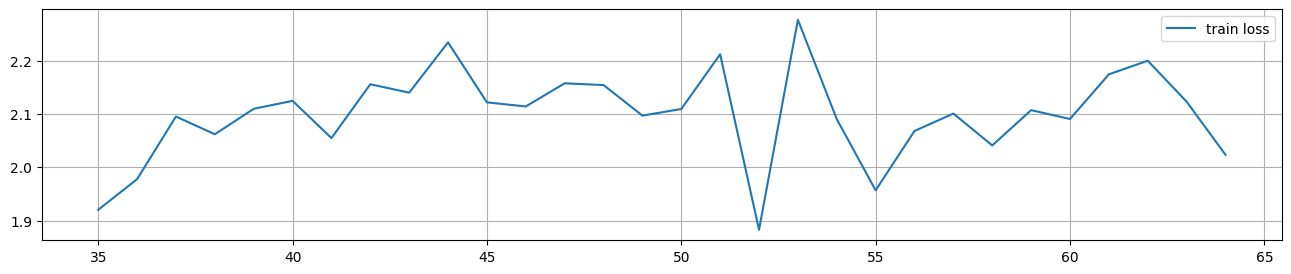

In [ ]:
hidden_dim = 10
start_mode = True
valid_mode = False
index_mode = False

# TODO: Visualize conv layer output
###
# config = {
#     "features": {
#         "pre-set": channels,
#         "sets":    [1024,    1024,    1,],
#         "samples": [25,      1,       1024,],
#     },
#     "params": {
#         "sets":    [4,       1,       num_classes,],
#         "samples": [(76, 1), (1, 5),  (1025, 1),],
#         "is conv": [True,    True,    False,]
#     },
# }
###
# config = {
#     "features": {
#         "pre-set": channels,
#         "sets":    [784,     784,     784,     1,],
#         "samples": [9,       9,       1,       784,],
#     },
#     "params": {
#         "sets":    [8,       16,      1,       num_classes,],
#         "samples": [(3, 1),  (9, 1),  (1, 4),  (28, 1),],
#         "is conv": [True,    True,    True,    False,]
#     },
# }
###
# config = {
#     "features": {
#         "pre-set": channels,
#         "sets":    [784, 784, 784, 1,],
#         "samples": [9, 9, 9, 784,],
#     },
#     "params": {
#         "sets":    [1, 1, 1, num_classes,],
#         "samples": [4, 4, 4, 4,],
#         "is conv": [False, False, False, False,]
#     },
# }
###
config = {
    "features": {
        "pre-set": channels,
        "sets":    [1024, 1024, 1,],
        "samples": [27, 54, 4*1024,],
    },
    "params": {
        "sets":    [2, 4, num_classes,],
        "samples": [54, 108, 54,],
        "is conv": [False, False, False,]
    },
}

tot_samples = [np.prod(smp) for smp in config["params"]["samples"]]
conv_params = int(np.dot(config["params"]["sets"][:-1], tot_samples[:-1]))
n_params = int(np.dot(config["params"]["sets"], tot_samples))

if start_mode:
  model = MModule4(
      config=config,
      idx_dim=idx_dim,
      device=device,
  )
  optimizer = Adam(model.parameters(), lr=1e-3)
  # optimizer = SGD(model.parameters(), lr=1e-3, momentum=0.9)
  widx0 = model.MW.idx[:, :conv_params].clone().detach()
  train_log = {
      "train loss": [],
      "eval loss": [],
      "acc": [],
      "set": [],
      "epoch": [],
  }
  epoch = 0

num_epochs = 720 * 4
epoch_len = 10 # 60

while epoch < num_epochs:
  epoch += 1
  ###
  # widx_diff = (model.MW.idx[:, :conv_params] - widx0)
  # print(widx_diff.abs().mean().item(), widx_diff.min().item(), widx_diff.max().item())
  ###
  model.train()
  train_iter = iter(train_data_loader)
  for _ in range(epoch_len):
    x, y = next(train_iter)
    x = x.to(device)
    y = y.to(device)
    x, y = prepare_input(x, y, device=device)
    y_pred = model.forward(x)
    optimizer.zero_grad()
    ###
    loss = maromba_loss(y, y_pred)
    _loss = loss.item()
    # loss += 1e-1 * torch.cat(model._penalties, dim=0).sum()
    ###
    loss.backward()
    optimizer.step()
    train_log["train loss"].append(_loss)
    train_log["eval loss"].append(np.nan)
    train_log["acc"].append(np.nan)
    train_log["set"].append("train")
    train_log["epoch"].append(epoch)
  if valid_mode:
    model.eval()
    with torch.no_grad():
      for x, y in iter(test_data_loader):
        x = x.to(device)
        y = y.to(device)
        x, y = prepare_input(x, y, device=device)
        y_pred = model.forward(x)
        loss = maromba_loss(y, y_pred)
        acc = maromba_accuracy(y, y_pred)
        train_log["eval loss"].append(loss.item())
        train_log["train loss"].append(np.nan)
        train_log["acc"].append(acc.item())
        train_log["set"].append("eval")
        train_log["epoch"].append(epoch)
    metric_cols = ["eval loss", "acc"]
    set_val = "eval"
  else:
    metric_cols = ["train loss",]
    set_val = "train"
  if index_mode:
    _layer = 0
    _batchidx = 0
    pool = model.all_pools[_layer]
    pool = MTensor.reshape(pool[_batchidx], (-1,))
    display.clear_output(wait=True)
    plot_features(pool)
    from time import sleep
    sleep(3)
    #
    # pool = model.all_samples[_layer - 1]
    # _shape = (
    #     config["features"]["sets"][_layer - 1],
    #     config["features"]["samples"][_layer - 1],
    # )
    # _set = (config["features"]["sets"][_layer - 1]) // 2
    # pool = MTensor.reshape(pool[_batchidx], _shape)[_set]
    # display.clear_output(wait=True)
    # plot_features(pool)
    # from time import sleep
    # sleep(3)
  else:
    group_cols = ["epoch"] + metric_cols
    df_train = pd.DataFrame(train_log)
    df_train = df_train[df_train["set"] == set_val]
    display.clear_output(wait=True)
    (
      df_train[group_cols]
      .groupby("epoch")
      .agg(lambda x: x.median(skipna=True))
      .reset_index()
      .sort_values("epoch", ascending=True)
      .tail(30)[metric_cols]
      .plot(figsize=(16, 3), grid=True)
    )
    plt.show()

In [ ]:
# tidx = idxu.reshape(32, -1, 3)[0].cpu().detach().numpy()
# tidx = idxu.reshape(32, -1, 18, 3)[0, 0].cpu().detach().numpy()
# tidx = idxv.reshape(-1, 3).cpu().detach().numpy()
## tidx = model.W_idx[0, :18].cpu().detach().numpy()
# plot_df = pd.DataFrame({"x": tidx[:, 0], "y": tidx[:, 1], "z": tidx[:, 2]})
# fig = px.scatter_3d(plot_df, x="x", y="y", z="z", color=None); fig.show();
##
# phi = idxu[0] @ idxv[0].T
# import seaborn as sns
# sns.heatmap(phi.cpu().detach().numpy()); plt.show()

### Visualização dos índices dos parâmetros

In [ ]:
soft_W_idx = scaled_idx # MTensor._soft_kernel(model.MW.idx, img_dim)
threshold = 100 # rows * cols * hidden_dim
# First layer
soft_W_idx = soft_W_idx[:, :threshold].reshape(1, -1, idx_dim)
# Last layer
# soft_W_idx = soft_W_idx[:, threshold:].reshape(1, -1, idx_dim)
soft_W_idx = soft_W_idx.cpu().detach().numpy()[0]

In [ ]:
from sklearn.manifold import TSNE

sample_idx = np.random.choice(
    len(soft_W_idx),
    min(len(soft_W_idx), 10000),
    replace=False
)

W_idx_tsne = TSNE(
    n_components=2,
    perplexity=10,
).fit_transform(soft_W_idx[sample_idx])

In [ ]:
plot_df = pd.DataFrame(
    {
        "W_idx x tsne": W_idx_tsne[:, 0],
        "W_idx y tsne": W_idx_tsne[:, 1],
    }
)

plot_df.plot.scatter(
    x="W_idx x tsne",
    y="W_idx y tsne",
    figsize=(24, 4),
    grid=True
)